In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\TSLA.csv")

In [4]:
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

In [5]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
print(df)
X = df[['Open-Close', 'High-Low']]
X.head()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-14  333.096680  337.570007  327.396667  328.333344  328.333344   
2022-04-18  329.676666  338.306671  324.470001  334.763336  334.763336   
2022-04-19  335.019989  344.980011  331.776672  342.716675  342.716675   
2022-04-20  343.333344  344.666656  325.083344  325.733337  325.733337   
2022-04-21  358.243347  364.073334  332.140015  336.260010  336.260010   
...                ...         ...         ...         ...         ...   
2023-04-06  183.080002  186.389999  179.740005  185.059998  185.059998   
2023-04-10  179.940002  185.100006  176.110001  184.509995  184.509995   
2023-04-11  186.690002  189.190002  185.649994  186.789993  186.789993   
2023-04-12  190.740005  191.580002  180.309998  180.539993  180.539993   
2023-04-13  182.960007  186.500000  180.940002  185.899994  185.899994   

               Volume  Open-Close   H

,Open-Close,High-Low
Date,,
2022-04-14,4.763336,10.173340
2022-04-18,-5.086670,13.836670
2022-04-19,-7.696686,13.203339
2022-04-20,17.600007,19.583312
2022-04-21,21.983337,31.933319


In [6]:
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
Y

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0])

In [7]:
split = int(0.6 * len(df))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]
cls = SVC().fit(X_train, Y_train)

In [8]:
df['Predicted_Signal'] = cls.predict(X)
df['Return'] = df.Close.pct_change()
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()

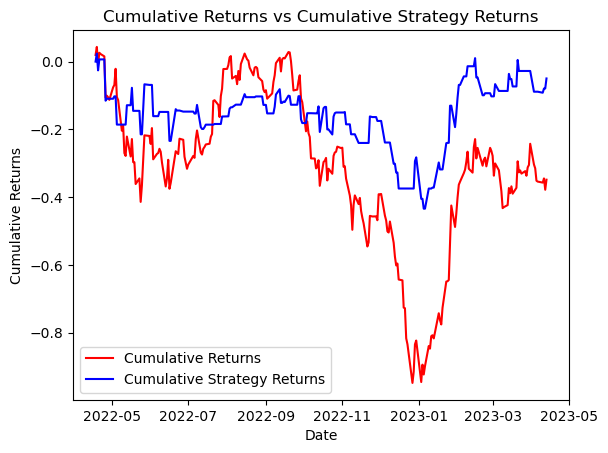

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'], color='red', label='Cumulative Returns')
plt.plot(df['Cum_Strategy'], color='blue', label='Cumulative Strategy Returns')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Cumulative Strategy Returns')
plt.show()

In [10]:
df['Predicted_Close'] = df['Close'] + df['Open-Close'].shift(-1) * df['Predicted_Signal']
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy,Predicted_Close
Date,,,,,,,,,,,,,,
2022-04-14,333.096680,337.570007,327.396667,328.333344,328.333344,58422300,4.763336,10.173340,0,NaN,NaN,NaN,NaN,328.333344
2022-04-18,329.676666,338.306671,324.470001,334.763336,334.763336,51715200,-5.086670,13.836670,1,0.019584,0.000000,0.019584,0.000000,327.066650
2022-04-19,335.019989,344.980011,331.776672,342.716675,342.716675,49847700,-7.696686,13.203339,1,0.023758,0.023758,0.043342,0.023758,360.316682
2022-04-20,343.333344,344.666656,325.083344,325.733337,325.733337,70711200,17.600007,19.583312,1,-0.049555,-0.049555,-0.006213,-0.025797,347.716674
2022-04-21,358.243347,364.073334,332.140015,336.260010,336.260010,105416400,21.983337,31.933319,0,0.032317,0.032317,0.026104,0.006520,336.260010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,183.080002,186.389999,179.740005,185.059998,185.059998,123857900,-1.979996,6.649994,1,-0.002480,-0.000000,-0.353999,-0.088791,180.490005
2023-04-10,179.940002,185.100006,176.110001,184.509995,184.509995,142154600,-4.569993,8.990005,1,-0.002972,-0.002972,-0.356971,-0.091763,184.410004
2023-04-11,186.690002,189.190002,185.649994,186.789993,186.789993,115770900,-0.099991,3.540008,0,0.012357,0.012357,-0.344614,-0.079406,186.789993


In [11]:
last_row = df.iloc[-1]
last_input = np.array([[last_row['Open-Close'], last_row['High-Low']]])
next_signal = cls.predict(last_input)[0]
next_open = df.iloc[-1]['Open']
next_close = next_open + (next_signal * last_row['Open-Close'])
print('Predicted next day closing price:', next_close)

Predicted next day closing price: 180.02002


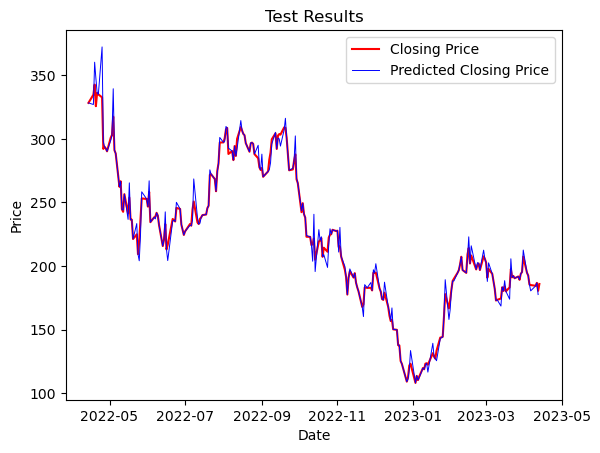

In [19]:
plt.plot(df['Close'],color='red', label = 'Closing Price')
plt.plot(df['Predicted_Close'],color='blue', label = 'Predicted Closing Price', linewidth = 0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Test Results')
plt.show()